In [1]:
!pip install reliability

     |████████████████████████████████| 209 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 1.9 MB/s eta 0:00:01
  Created wheel for mplcursors: filename=mplcursors-0.4-py3-none-any.whl size=19968 sha256=f627c1140c6cd33b549bba6b52cd28761c792757196de8383d0bbb4c23dbffa1
  Stored in directory: /home/tdird/.cache/pip/wheels/39/51/00/b726dab526916d297e4416c77aa031f4fdb9747e110593537d
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=21cce8c1ad51f4171248f5dc71298b86171a7df020c580c9bd1f52197abbba90
  Stored in directory: /home/tdird/.cache/pip/wheels/85/f5/d2/3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4035 sha256=e7424cb256111c41d575ab524c6e3c94f3d5ca9393d72990d58ff94cf7ef4741
  Stored in directory: /home/tdird/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built mplcursors autograd autograd-gamma

https://reliability.readthedocs.io/en/latest/Probability%20plots.html

# Probability plots

Proabability plots are a general term for several different plotting techniques. One of these techniques is a graphical method for comparing two data sets and includes probability-probability (PP) plots and quantile-quantile (QQ) plots:

https://reliability.readthedocs.io/en/latest/Probability-Probability%20plots.html

https://reliability.readthedocs.io/en/latest/Quantile-Quantile%20plots.html

The second plotting technique is used for assessing the goodness of fit of a distribution by plotting the empirical CDF of the failures against their failure time and scaling the axes in such as way that the distribution appears linear. This method allows the reliability analyst to fit the distribution parameters using a simple “least squares” fitting method for a straight line and was popular before computers were capable of calculating the MLE estimates of the parameters. While we do not typically favour the use of least squares as a fitting method, we can still use probability plots to assess the goodness of fit. The module `reliability.Probability_plotting` contains functions for each of the standard distributions supported in reliability. These functions are:

- Weibull_probability_plot

- Normal_probability_plot

- Lognormal_probability_plot

- Gamma_probability_plot

- Beta_probability_plot

- Exponential_probability_plot

- Exponential_probability_plot_Weibull_Scale

- Loglogistic_probability_plot

- Gumbel_probability_plot

There is also a function to obtain the plotting positions called plotting_positions. This function is mainly used by other functions and is not discussed further here. For more detail, consult the help file of the function. To obtain a scatter plot of the plotting positions in the form of the PDF, CDF, SF, HF, or CHF, you can use the function plot_points. This is explained here:

https://reliability.readthedocs.io/en/latest/Fitting%20a%20specific%20distribution%20to%20data.html#example-2

Within each of the above probability plotting functions you may enter failure data as well as right censored data. For those distributions that have a function in `reliability.Fitters` for fitting location shifted distributions (Weibull_3P, Gamma_3P, Lognormal_3P, Exponential_2P, Loglogistic_3P), you can explicitly tell the probability plotting function to fit the gamma parameter using `fit_gamma=True`. By default the gamma parameter is not fitted. Fitting the gamma parameter will also change the x-axis to time-gamma such that everything will appear linear. An example of this is shown in the second example below.

>Note: Beta and Gamma probability plots have their y-axes scaled based on the distribution’s parameters so you will find that when you overlay two Gamma or two Beta distributions on the same Gamma or Beta probability paper, one will be a curved line if they have different shape parameters. This is unavoidable due to the nature of Gamma and Beta probability paper and is the reason why you will never find a hardcopy of such paper and also the reason why these distributions are not used in ALT probability plotting.

>Note: Confidence intervals will not appear on Gamma or Beta probability plots. These confidence intervals are in development.

Inputs:

- failures - the array or list of failure times

- right_censored - the array or list of right censored failure times

- fit_gamma - True/False
    + Default is False
    + Specify this as True in order to fit the location shifted distribution and scale the x-axis to time - gamma
    + This is only included for Weibull, Gamma, Lognormal, Loglogistic, and Exponential probability plots

- show_fitted_distribution - True/False
    + If true, the fitted distribution will be plotted on the probability plot
    + Defaults to True
    + If you want a probability plot with just the data points and no line for the distribution then set this to False

- a - the heuristic constant for plotting positions of the form (k-a)/(n+1-2a)
    + Default is a=0.3 which is the median rank method (same as the default in Minitab)
    + For more heuristics, see Wikipedia

https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot#Heuristics

- CI - the confidence interval for the bounds
    + Default is 0.95 for 95% CI
    + Not yet available for Gamma or Beta probability plots

- CI_type - time, reliability, None
    + Default is time
    + This is the type of CI bounds. i.e. bounds on time or bounds on reliability
    + Use None to turn off the confidence intervals
    + Not yet available for Gamma or Beta probability plots
    + Not required for either of the Exponential probability plots since CI bounds on time are same as bounds on reliability

- plotting keywords are also accepted where relevant and they are mostly applied to the fitted distribution line
    + The exception to this is for color which defaults to blue line and black points but if specified the chosen color will be applied to both line and points
    + This is useful when overlaying multiple datasets on a single probability plot

Outputs:

- The plot is the only output
    + Use plt.show() to show it

## Example 1

In the example below we generate some samples from a Normal Distribution and provide these to the probability plotting function. It is also possible to overlay other plots of the CDF as is shown by the dashed line.

In [5]:
from reliability.Distributions import Normal_Distribution
from reliability.Probability_plotting import Normal_probability_plot
import matplotlib.pyplot as plt

dist = Normal_Distribution(mu=50, sigma=10)
failures = dist.random_samples(100, seed=5)
print("Mean =", failures.mean())
print("Sigma =", failures.std())

Mean = 50.91546643867777
Sigma = 9.309767032155012


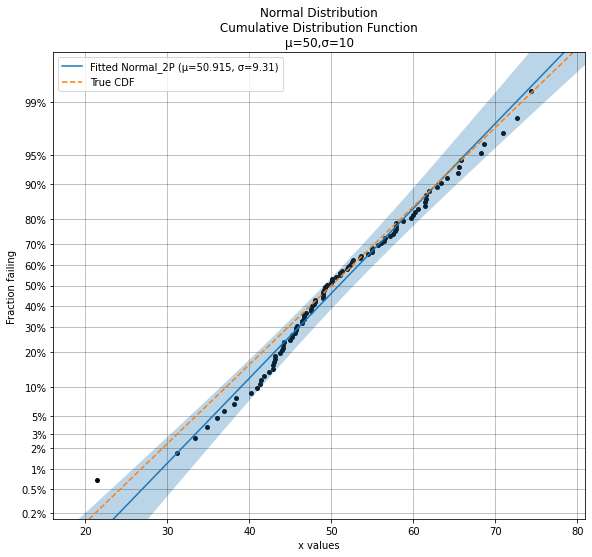

In [6]:
Normal_probability_plot(failures=failures)  # generates the probability plot
dist.CDF(linestyle='--', label='True CDF')  # this is the actual distribution provided for comparison
plt.legend()
plt.show()

## Example 2

In this second example, we will fit an Exponential distribution to some right censored data. To create this data, we will generate the random samples from an Exponential distribution that has a location shift of 12. Once again, the true CDF has also been plotted to provide the comparison. Note that the x-axis is time-gamma as it is necessary to subtract gamma from the x-plotting positions if we want the plot to appear linear.

In [7]:
from reliability.Distributions import Exponential_Distribution
from reliability.Probability_plotting import Exponential_probability_plot
import matplotlib.pyplot as plt
from reliability.Other_functions import make_right_censored_data

dist = Exponential_Distribution(Lambda=0.25, gamma=12)
raw_data = dist.random_samples(100, seed=42)  # draw some random data from an exponential distribution
data = make_right_censored_data(raw_data, threshold=17)  # right censor the data at 17

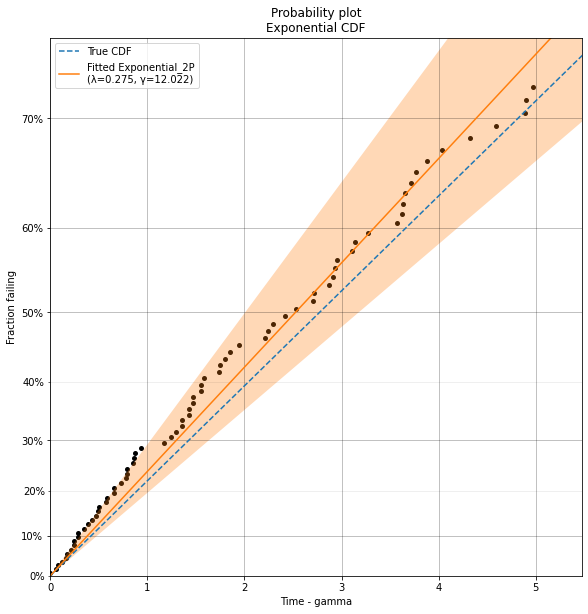

In [8]:
Exponential_Distribution(Lambda=0.25).CDF(linestyle='--', label='True CDF')  # we can't plot dist because it will be location shifted
Exponential_probability_plot(failures=data.failures, right_censored=data.right_censored, fit_gamma=True)  # do the probability plot. Note that we have specified to fit gamma
plt.legend()
plt.show()

## Example 3

In this third example, we will see how probability plotting can be used to highlight the importance of getting as much data as possible. This code performs a loop in which increasing numbers of samples are used for fitting a Weibull distribution and the accuracy of the results (shown both in the legend and by comparison with the True CDF) increases with the number of samples. We can also see the width of the confidence intervals decreasing as the number of samples increases.

In [9]:
from reliability.Distributions import Weibull_Distribution
from reliability.Probability_plotting import Weibull_probability_plot
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=250, beta=3)

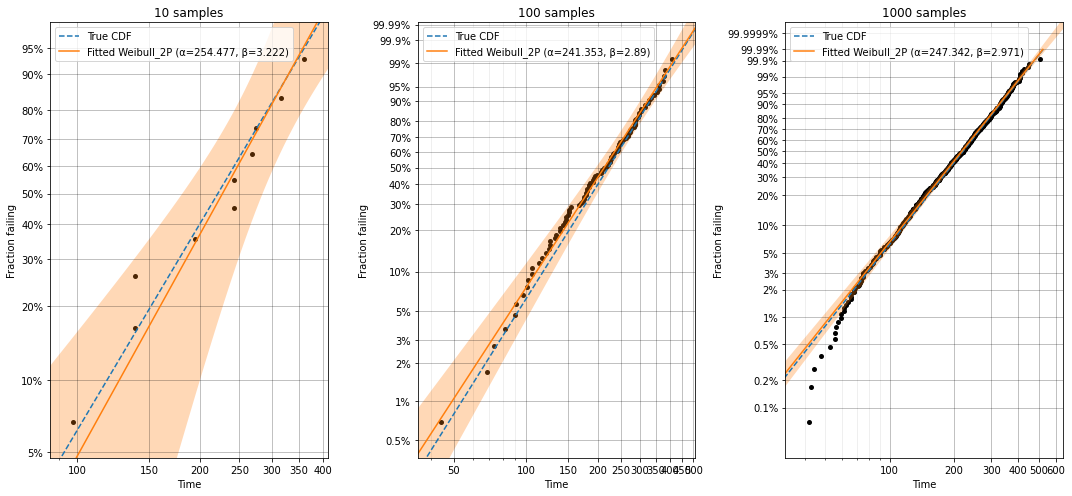

In [10]:
for i, x in enumerate([10,100,1000]):
    plt.subplot(131 + i)
    dist.CDF(linestyle='--', label='True CDF')
    failures = dist.random_samples(x, seed=42)  # take 10, 100, 1000 samples
    Weibull_probability_plot(failures=failures)  # this is the probability plot
    plt.title(str(str(x) + ' samples'))
plt.gcf().set_size_inches(15, 7)  # adjust the figure size after creation. Necessary to do it after as it it automatically adjusted within probability_plot
plt.tight_layout()
plt.show()

## Example 4

In this fourth example, we will take a look at the special case of the Exponential probability plot using the Weibull Scale. This plot is essentially a Weibull probability plot, but the fitting and plotting functions are Exponential. The reason for plotting an Exponential distribution on Weibull probability paper is to achieve parallel lines for different Lambda parameters rather than having the lines radiating from the origin as we see in the Exponential probability plot on Exponential probability paper. This has applications in ALT probability plotting and is the default plot provided from `Fit_Exponential_1P` and `Fit_Exponential_2P`. An example of the differences between the plots are shown below. Remember that the Alpha parameter from the Weibull distribution is equivalent to 1/Lambda from the Exponential distribution and a Weibull distribution with Beta = 1 is the same as an Exponential distribution.

In [11]:
from reliability.Distributions import Exponential_Distribution
from reliability.Probability_plotting import Exponential_probability_plot, Weibull_probability_plot, Exponential_probability_plot_Weibull_Scale
import matplotlib.pyplot as plt

data1 = Exponential_Distribution(Lambda=1 / 10).random_samples(50, seed=42)  # should give Exponential Lambda = 0.01 OR Weibull alpha = 10
data2 = Exponential_Distribution(Lambda=1 / 100).random_samples(50, seed=42)  # should give Exponential Lambda = 0.001 OR Weibull alpha = 100

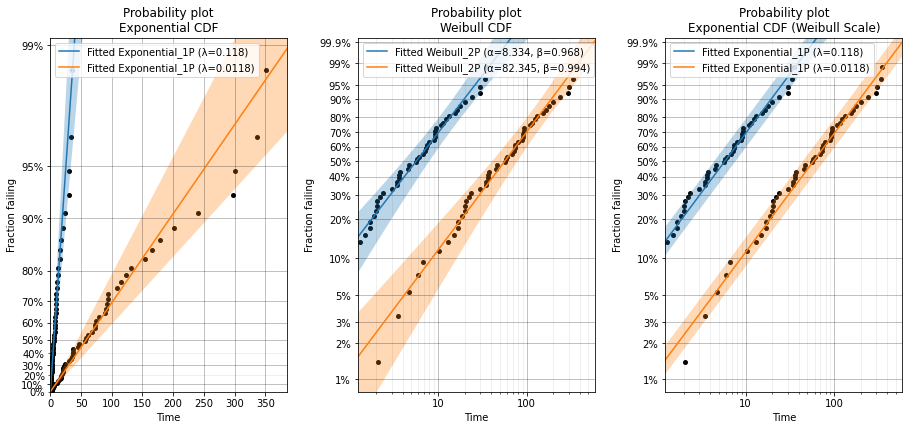

In [12]:
plt.subplot(131)
Exponential_probability_plot(failures=data1)
Exponential_probability_plot(failures=data2)
plt.subplot(132)
Weibull_probability_plot(failures=data1)
Weibull_probability_plot(failures=data2)
plt.subplot(133)
Exponential_probability_plot_Weibull_Scale(failures=data1)
Exponential_probability_plot_Weibull_Scale(failures=data2)
plt.gcf().set_size_inches(13, 6)
plt.subplots_adjust(left=0.06, right=0.97, top=0.91, wspace=0.30)  # format the plot
plt.show()

## Example 5

In this final example, we take a look at how a probability plot can show us that there’s something wrong with our assumption of a single distribution. To generate the data, the random samples are drawn from two different distributions which are shown in the left image. In the right image, the scatterplot of failure times is clearly non-linear. The green line is the attempt to fit a single `Weibull_2P` distribution and this will do a poor job of modelling the data. Also note that the points of the scatterplot do not fall on the True CDF of each distribution. This is because the median rank method of obtaining the plotting positions does not work well if the failure times come from more than one distribution. If you see a pattern like this, try a mixture model or a competing risks model:

https://reliability.readthedocs.io/en/latest/Mixture%20models.html

https://reliability.readthedocs.io/en/latest/Competing%20risk%20models.html

Always remember that cusps, corners, and doglegs indicate a mixture of failure modes.

In [13]:
from reliability.Probability_plotting import Weibull_probability_plot
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
import numpy as np

dist_1 = Weibull_Distribution(alpha=200, beta=3)
dist_2 = Weibull_Distribution(alpha=900, beta=4)

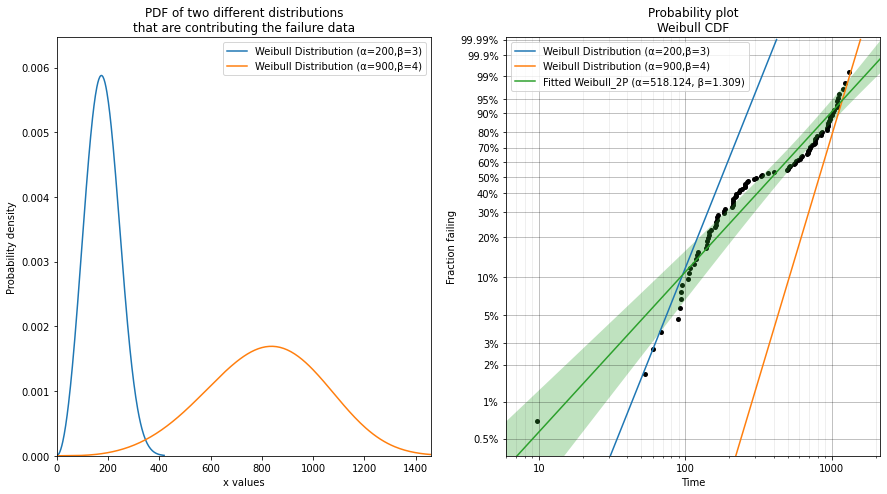

In [14]:
plt.subplot(121)  # this is for the PDFs of the 2 individual distributions
dist_1.PDF(label=dist_1.param_title_long)
dist_2.PDF(label=dist_2.param_title_long)
plt.legend()
plt.title('PDF of two different distributions\nthat are contributing the failure data')
plt.subplot(122)  # this will be the probability plot
dist_1_data = dist_1.random_samples(50, seed=1)
dist_2_data = dist_2.random_samples(50, seed=1)
all_data = np.hstack([dist_1_data, dist_2_data])  # combine the failure data into one array
dist_1.CDF(label=dist_1.param_title_long)  # plot each individual distribution for comparison
dist_2.CDF(label=dist_2.param_title_long)
Weibull_probability_plot(failures=all_data)  # do the probability plot
plt.gcf().set_size_inches(13, 7)  # adjust the figure size after creation. Necessary to do it after as it it automatically ajdusted within probability_plot
plt.subplots_adjust(left=0.08, right=0.96)  # formatting the layout
plt.legend()
plt.show()

## What does a probability plot show me?

A probability plot shows how well your data is modelled by a particular distribution. By scaling the axes in such a way that the fitted distribution’s CDF appears to be a straight line, we can judge whether the empirical CDF of the failure data (the black dots) are in agreement with the CDF of the fitted distribution. Ideally we would see that all of the black dots would lie on the straight line but most of the time this is not the case. A bad fit is evident when the line or curve formed by the black dots is deviating significantly from the straight line. We can usually tolerate a little bit of deviation at the tails of the distribution but the majority of the black dots should follow the line. A historically popular test was the [‘fat pencil test’](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/normality/normal-probability-plots-and-the-fat-pencil-test/), which suggested that if a fat pencil could cover the majority of the data points then the fit was probably suitable. Such a method makes no mention of the size of the plot window which could easily affect the result so it is best to use your own judgement and experience. This approach is not a substitute for statistical inference so it is often preferred to use quantitative measures for goodness of fit such as AICc and BIC. Despite being an imprecise measure, probability plots remain popular among reliability engineers and in reliability engineering software as they can reveal many features that are not accurately captured in a single goodness of fit statistic.

## Example 6

In [15]:
from reliability.Probability_plotting import Weibull_probability_plot, Exponential_probability_plot
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt

data = Weibull_Distribution(alpha=5, beta=3).random_samples(100, seed=1)

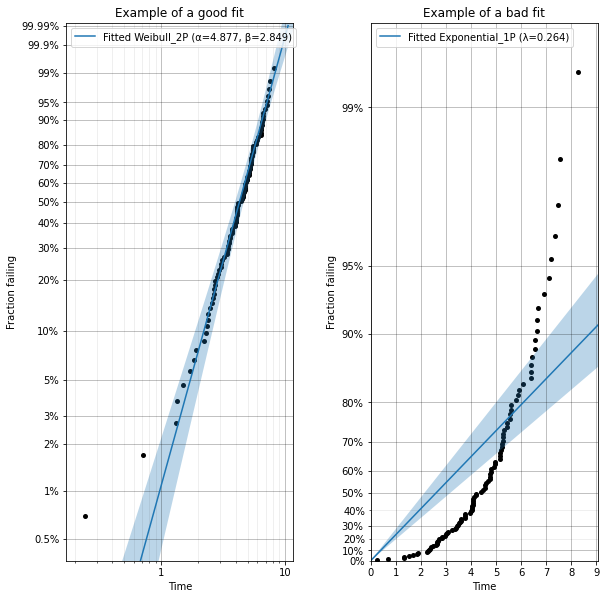

In [16]:
plt.subplot(121)
Weibull_probability_plot(failures=data)
plt.title('Example of a good fit')
plt.subplot(122)
Exponential_probability_plot(failures=data)
plt.title('Example of a bad fit')
plt.subplots_adjust(bottom=0.1, right=0.94, top=0.93, wspace=0.34)  # adjust the formatting
plt.show()